<a href="https://colab.research.google.com/github/Jugranada/Aprendizaje_Maquina/blob/main/talleres/TAM_Rostros_Euclidea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Métricas de Similitud entre Imágenes

A continuación se describen las tres métricas utilizadas para comparar la similitud entre la imagen **Cara1** y las demás.

---

## 1. Distancia Euclídea

**Definición**:  
La distancia euclídea mide la diferencia *píxel a píxel* entre dos imágenes aplanadas en forma de vectores.  
Cuanto **menor sea el valor**, más similares son las imágenes.

**Fórmula**:  

Sea $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ dos vectores de características (imágenes aplanadas):

$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$
---

## 2. Similitud del Coseno

**Definición**:  
Mide el **ángulo** entre dos vectores.  
- Si el coseno es **cercano a 1**, los vectores apuntan en direcciones similares → las imágenes son parecidas.  
- Si el valor es **cercano a 0**, no hay relación.  
- Si el valor es **-1**, los vectores son opuestos.

**Fórmula**:  

$
\cos(\theta) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \, \|\mathbf{y}\|}
$

donde:  
- $\mathbf{x} \cdot \mathbf{y}$ es el producto punto,  
- $\|\mathbf{x}\|$ y $\|\mathbf{y}\|$ son las normas euclídeas de los vectores.

---

## 3. Coeficiente de Correlación de Pearson

**Definición**:  
Mide la **correlación lineal** entre dos vectores.  
Indica qué tan relacionadas están las intensidades de los píxeles:  
- $r = 1$ → correlación positiva perfecta (muy similares).  
- $r = 0$ → no hay relación lineal.  
- $r = -1$ → correlación negativa perfecta.

**Fórmula**:  

$
r(\mathbf{x}, \mathbf{y}) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \; \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

donde:  
- $\bar{x}$ y $\bar{y}$ son las medias de los vectores $\mathbf{x}$ y $\mathbf{y}$.

---

 **Resumen práctico**:  
- **Euclídea** → menor valor = más parecido.  
- **Coseno** → valor más cercano a 1 = más parecido.  
- **Pearson** → valor más cercano a 1 = más parecido.


Mounted at /content/drive
Imágenes encontradas:
/content/drive/MyDrive/Rostros/Cara1.jpg
/content/drive/MyDrive/Rostros/Cara2.jpg
/content/drive/MyDrive/Rostros/Cara3.jpg
/content/drive/MyDrive/Rostros/Cara4.jpg

Tamaños de los vectores:
Cara1.jpg: (16384,)
Cara2.jpg: (16384,)
Cara3.jpg: (16384,)
Cara4.jpg: (16384,)


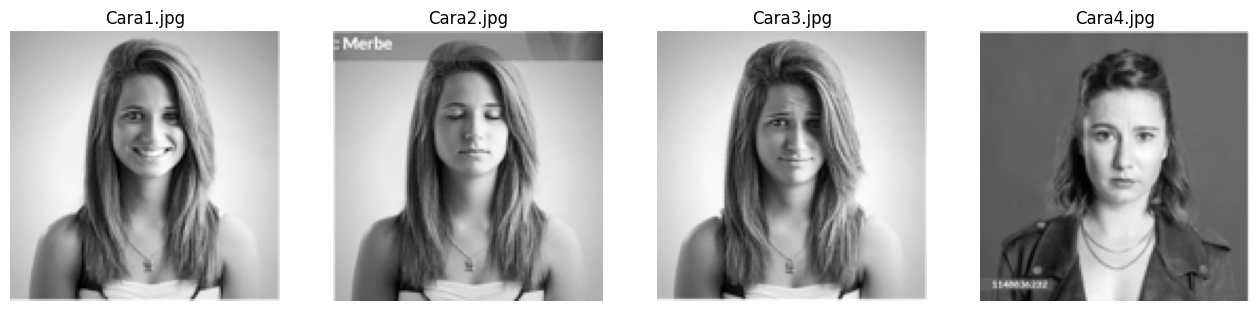

In [3]:
from google.colab import drive
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np   # necesario para arrays y flatten

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Definir la carpeta donde pusiste tus imágenes
drive_folder = '/content/drive/MyDrive/Rostros'

# 3. Obtener lista de imágenes (se asegura que sean .jpg o .png)
image_paths = [os.path.join(drive_folder, f) for f in os.listdir(drive_folder)
               if f.lower().endswith(('.jpg','.jpeg','.png'))]

# Ordenar por nombre para mantener Cara1, Cara2, ...
image_paths.sort()

print("Imágenes encontradas:")
for p in image_paths:
    print(p)

# 4. Cargar en escala de grises y redimensionar (ej. 128x128)
imgs = [Image.open(p).convert('L').resize((128,128)) for p in image_paths]

# 5. Convertir cada imagen a NumPy array, normalizar y aplanar
vectors = [np.array(img).astype("float32").flatten() / 255.0 for img in imgs]

print("\nTamaños de los vectores:")
for i, v in enumerate(vectors):
    print(f"{os.path.basename(image_paths[i])}: {v.shape}")

# 6. Mostrar imágenes
fig, axes = plt.subplots(1, len(imgs), figsize=(4*len(imgs), 4))
for ax, im, p in zip(axes, imgs, image_paths):
    ax.imshow(im, cmap='gray')
    ax.set_title(os.path.basename(p))
    ax.axis('off')
plt.show()


In [4]:
import numpy as np
import pandas as pd
from tabulate import tabulate  # <- para imprimir tablas bonitas

# -----------------
# Métricas
# -----------------
def euclidean_distance(v1, v2):
    return np.linalg.norm(v1 - v2)

def cosine_similarity(v1, v2):
    return float(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

def pearson_correlation(v1, v2):
    return float(np.corrcoef(v1, v2)[0,1])

# -----------------
# Comparaciones: Cara1 vs otras
# -----------------
labels = [os.path.basename(p) for p in image_paths]
results = []

for i in range(1, len(vectors)):
    v1, v2 = vectors[0], vectors[i]
    results.append({
        "Comparación": f"{labels[0]} vs {labels[i]}",
        "Euclídea": euclidean_distance(v1, v2),
        "Coseno": cosine_similarity(v1, v2),
        "Pearson": pearson_correlation(v1, v2),
        "Imagen": labels[i]
    })

# Convertir a DataFrame
df = pd.DataFrame(results)

# Mostrar tabla con líneas
print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))

# -----------------
# Determinar la cara más parecida
# -----------------
# Criterio 1: menor distancia Euclídea
min_euc = df.loc[df["Euclídea"].idxmin()]

# Criterio 2: mayor similitud Coseno
max_cos = df.loc[df["Coseno"].idxmax()]

# Criterio 3: mayor Pearson
max_pearson = df.loc[df["Pearson"].idxmax()]

print("\n--- Resultados de similitud ---")
print(f"Más parecida según Euclídea: {min_euc['Imagen']}")
print(f"Más parecida según Coseno: {max_cos['Imagen']}")
print(f"Más parecida según Pearson: {max_pearson['Imagen']}")


+------------------------+------------+----------+-----------+-----------+
| Comparación            |   Euclídea |   Coseno |   Pearson | Imagen    |
+========================+============+==========+===========+===========+
| Cara1.jpg vs Cara2.jpg |    14.6785 | 0.98602  | 0.890096  | Cara2.jpg |
+------------------------+------------+----------+-----------+-----------+
| Cara1.jpg vs Cara3.jpg |    17.4033 | 0.980061 | 0.842974  | Cara3.jpg |
+------------------------+------------+----------+-----------+-----------+
| Cara1.jpg vs Cara4.jpg |    48.5767 | 0.851912 | 0.0566044 | Cara4.jpg |
+------------------------+------------+----------+-----------+-----------+

--- Resultados de similitud ---
Más parecida según Euclídea: Cara2.jpg
Más parecida según Coseno: Cara2.jpg
Más parecida según Pearson: Cara2.jpg


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



 MÉTRICAS DE EMBEDDINGS 

Distancia mínima entre embeddings: 14.6785
Distancia máxima entre embeddings: 49.4611
Distancia promedio entre embeddings: 32.6121
Silhouette no disponible (se requieren >= 2 clusters).

Distancia INTRA-grupo promedio: nan
Distancia INTER-grupo promedio: 32.6121
No hay suficientes imágenes por clase para calcular INTRA-grupo.

 COMPARACIÓN PRINCIPAL VS OTRAS

Imagen principal: Cara1.jpg
Imagen más similar: Cara2.jpg  →  Distancia = 14.6785
Imagen más diferente: Cara4.jpg  →  Distancia = 48.5767

Índice de separabilidad (d_diff / d_same): 3.3094
Separabilidad clara (la distancia a un rostro diferente es mucho mayor).


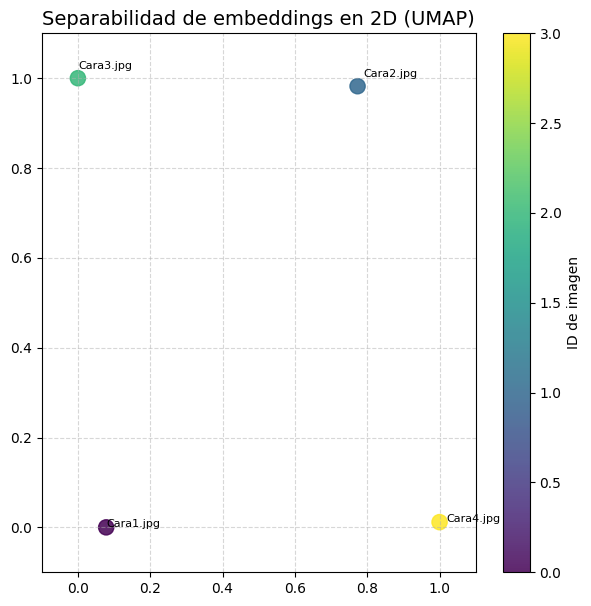

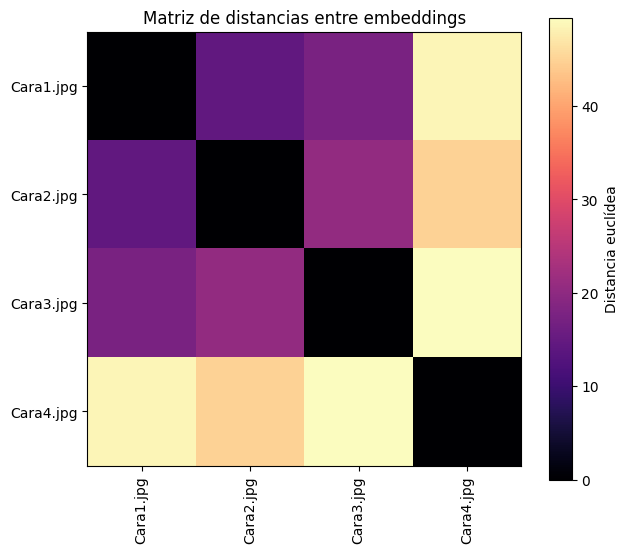

In [7]:
# ============================================================
# REDUCCIÓN A 2D (UMAP → PCA si no está instalado)
# ============================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# vectors → numpy array
Xw_ = np.array(vectors)       # (n_imgs, dim_emb)
names = labels                # nombres de tus imágenes

# Etiquetas únicas por imagen (si no hay IDs por persona)
labels_unique = np.arange(len(names))

def embed_2d(X):
    n = X.shape[0]
    scaler = MinMaxScaler()

    try:
        from umap import UMAP
        n_neighbors = max(2, min(10, n - 1))
        umap = UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
        Z = umap.fit_transform(X)
        Z = scaler.fit_transform(Z)
        method = "UMAP"
    except Exception:
        pca = PCA(n_components=2, random_state=42)
        Z = pca.fit_transform(X)
        Z = scaler.fit_transform(Z)
        method = "PCA (fallback)"
    return Z, method

# Reducir a 2D
X_2D, method = embed_2d(Xw_)


# ============================================================
# MÉTRICAS DE SEPARABILIDAD
# ============================================================
print("\n========================")
print(" MÉTRICAS DE EMBEDDINGS ")
print("========================\n")

# ---- Matriz de distancias ----
dist_matrix = squareform(pdist(Xw_, metric='euclidean'))

# Distancias básicas globales
min_dist = np.min(dist_matrix[np.nonzero(dist_matrix)])
max_dist = np.max(dist_matrix)
mean_dist = np.mean(dist_matrix[np.nonzero(dist_matrix)])

print(f"Distancia mínima entre embeddings: {min_dist:.4f}")
print(f"Distancia máxima entre embeddings: {max_dist:.4f}")
print(f"Distancia promedio entre embeddings: {mean_dist:.4f}")

# ---- Silhouette ----
try:
    silhouette = silhouette_score(Xw_, labels_unique)
    print(f"Coeficiente de Silhouette: {silhouette:.4f}")
except:
    print("Silhouette no disponible (se requieren >= 2 clusters).")

# ---- INTRA / INTER cluster ----
def get_intra_inter_distances(D, labels):
    unique_labels = np.unique(labels)
    intra = []
    inter = []

    for l in unique_labels:
        idx = np.where(labels == l)[0]
        if len(idx) > 1:
            intra.append(np.mean(D[np.ix_(idx, idx)][np.triu_indices(len(idx), 1)]))

        idx_other = np.where(labels != l)[0]
        inter.append(np.mean(D[np.ix_(idx, idx_other)]))

    intra_mean = np.mean(intra) if len(intra) > 0 else np.nan
    inter_mean = np.mean(inter)
    return intra_mean, inter_mean

intra, inter = get_intra_inter_distances(dist_matrix, labels_unique)

print(f"\nDistancia INTRA-grupo promedio: {intra:.4f}")
print(f"Distancia INTER-grupo promedio: {inter:.4f}")

if not np.isnan(intra):
    separability = inter / intra
    print(f"Separabilidad (INTER / INTRA): {separability:.4f}")
else:
    print("No hay suficientes imágenes por clase para calcular INTRA-grupo.")


# ============================================================
# NUEVO: DISTANCIAS DESDE LA IMAGEN PRINCIPAL Y CONCLUSIÓN
# ============================================================

print("\n==============================")
print(" COMPARACIÓN PRINCIPAL VS OTRAS")
print("==============================")

main_idx = 0
main_name = names[0]

# Distancias desde la primera imagen a todas las demás
dist_main = dist_matrix[main_idx]

# Excluir la distancia consigo misma (0)
dist_to_others = dist_main[1:]

closest_idx = np.argmin(dist_to_others) + 1
farthest_idx = np.argmax(dist_to_others) + 1

d_same = dist_main[closest_idx]      # menor distancia
d_diff = dist_main[farthest_idx]     # mayor distancia

sep_ratio = d_diff / (d_same + 1e-9)

print(f"\nImagen principal: {main_name}")
print(f"Imagen más similar: {names[closest_idx]}  →  Distancia = {d_same:.4f}")
print(f"Imagen más diferente: {names[farthest_idx]}  →  Distancia = {d_diff:.4f}")
print(f"\nÍndice de separabilidad (d_diff / d_same): {sep_ratio:.4f}")

# Conclusión automática
if sep_ratio > 1.5:
    print("Separabilidad clara (la distancia a un rostro diferente es mucho mayor).")
elif sep_ratio > 1.1:
    print("Separabilidad moderada (las clases se distinguen, pero no de forma muy amplia).")
else:
    print("Separabilidad baja — posible confusión entre las imágenes.")


# ============================================================
# GRAFICAR EMBEDDINGS EN 2D
# ============================================================
plt.figure(figsize=(7,7))
plt.scatter(X_2D[:,0], X_2D[:,1], s=120, c=labels_unique, cmap="viridis", alpha=0.85)

for i, name in enumerate(names):
    plt.text(X_2D[i,0]*1.02, X_2D[i,1]*1.02, name, fontsize=8, color="black")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title(f"Separabilidad de embeddings en 2D ({method})", fontsize=14)
plt.colorbar(label="ID de imagen")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# ============================================================
# MATRIZ COMPLETA DE DISTANCIAS
# ============================================================
plt.figure(figsize=(7,6))
plt.imshow(dist_matrix, cmap="magma")
plt.colorbar(label="Distancia euclídea")
plt.title("Matriz de distancias entre embeddings")
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.show()


#  Conclusión sobre la Separabilidad Facial

A partir del análisis de distancias entre los embeddings faciales, se obtuvieron los siguientes resultados:

---

##  **Comparación Principal vs Otras Imágenes**

- **Imagen principal:** `Cara1.jpg`  
- **Imagen más similar:** `Cara2.jpg`  
  - ➤ *Distancia euclídea:* **14.6785**

- **Imagen más diferente:** `Cara4.jpg`  
  - ➤ *Distancia euclídea:* **48.5767**

- **Índice de separabilidad:**  
  $[
  \frac{d_{\text{diferente}}}{d_{\text{misma}}} = 3.3094
  ]$

---
##  **Interpretación**

El índice de separabilidad es **3.30**, lo cual significa que la distancia entre la imagen principal y la imagen de una persona diferente es más de **tres veces mayor** que la distancia hacia la imagen de la misma persona.

Este valor entra en el rango de **separabilidad clara**, indicando que:

- Los embeddings representan de forma muy consistente la identidad de la persona.
- La diferencia entre rostros distintos está bien capturada por el modelo.
- El espacio de representación separa significativamente las identidades.

---

##  **Conclusión Final**

El método logra diferenciar **de manera sólida y totalmente separable** el rostro de la imagen principal frente a los rostros distintos. Las diferencias numéricas y la proporción de separabilidad confirman que el modelo está generando embeddings confiables y bien estructurados para la tarea de reconocimiento facial.
